In [1]:
from rejector.prediction import Prediction
from rejector.values import Values
from rejector.metric import Metric
from rejector.pdfs import PDFs
from rejector.pdf import PDF
import numpy as np
from typing import List
from matplotlib import pyplot
from tqdm import tqdm
import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.INFO)

In [2]:
predictions = []
# Add False Negatives
for p in np.linspace(0, 0.3, 100):
    prediction = Prediction(
        "negative", "positive", p, "positive", None)
    predictions.append(prediction)

# Add False Positives
for p in np.linspace(0, 0.3, 100):
    prediction = Prediction(
        "positive", "negative", p, "positive", None)
    predictions.append(prediction)

# Add True Negatives
for p in np.linspace(0.7, 1.0, 100):
    prediction = Prediction(
        "negative", "negative", p, "positive", None)
    predictions.append(prediction)

# Add True Positives
for p in np.linspace(0.7, 1.0, 100):
    prediction = Prediction(
        "positive", "positive", p, "positive", None)
    predictions.append(prediction)

In [3]:
kde = PDFs.estimator(predictions)
pdf = PDF(predictions, 1.0, kde)
print( pdf.integral(min=0.0, max=1.0))
print( pdf.integral(min=0.0, max=0.5))
print( pdf.integral(min=0.0, max=0.25))
print( pdf.integral(min=0.0, max=0.0))
print( pdf.integral(min=0.25, max=1.0))

c:\Users\phili\anaconda3\envs\smart-rejector\lib\site-packages\statsmodels\nonparametric\kernel_density.py:158: RuntimeWarning: invalid value encountered in log
  L += func(f_i)
INFO:root:KDE optimal bandwidths: [0.01415169]


0.9787979288370952
0.4893989644185475
0.40427446663252137
0.0
0.5743584674295481


In [4]:
# values = Values(value_TP=0.0, value_TN=0.0, value_FP=5.0, value_FN=5.0,value_rejection=2.0)
# metric = Metric(values, predictions)
# metric.plot_pdfs()
# metric.plot_effectiveness()

INFO:root:Fraction of TPS: 0.175
INFO:root:Fraction of TNS: 0.4558333333333333
INFO:root:Fraction of FPS: 0.12416666666666666
INFO:root:Fraction of FNS: 0.245
INFO:root:KDE optimal bandwidths: [0.01223854]
INFO:root:KDE optimal bandwidths: [0.00516255]
INFO:root:KDE optimal bandwidths: [0.01749948]
INFO:root:KDE optimal bandwidths: [0.00971166]


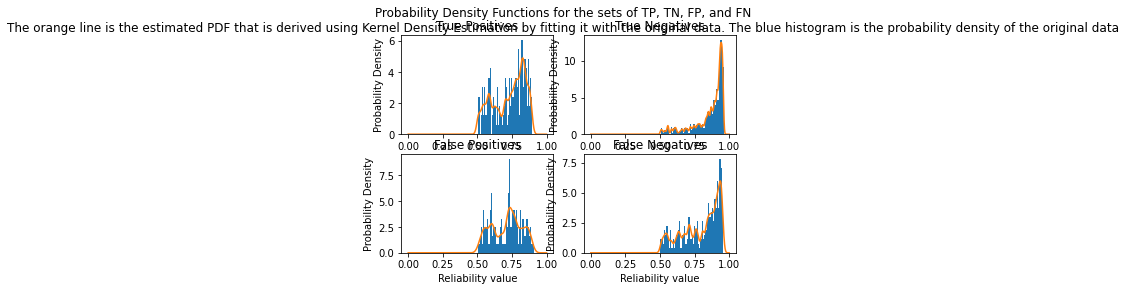

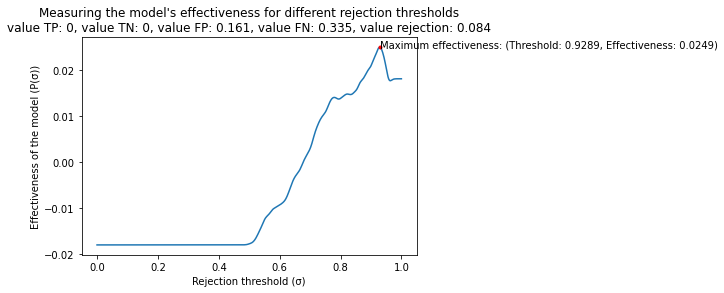

In [5]:
predictions = Prediction.load("input/distilbert-waseem-semeval.p", gold_class="Hate")
values = Values(value_TP=0, value_TN=0, value_FP=0.161, value_FN=0.335,value_rejection=0.084)
metric = Metric(values, predictions)
metric.plot_pdfs()
metric.plot_effectiveness()

In [12]:
accepted = list(filter(lambda p: p.predicted_value >= 0.9289, predictions))
correct_accepted = list(filter(lambda p: p.predicted_class == p.actual_class, accepted))
rejected = list(filter(lambda p: p.predicted_value < 0.9289, predictions))
print("Num accepted: ", len(accepted))
print("Accuracy accepted: ", len(correct_accepted) / len(accepted))
print("Num rejected: ", len(rejected))

Num accepted:  242
Accuracy accepted:  1.0
Num rejected:  757
